# Zadanie 1

In [21]:
def b_pow_x_mod_N(b=4, N=55, xs = range(1, 101)):
    return {x : pow(b, x, N) for x in xs}

f = b_pow_x_mod_N()
f

{1: 4,
 2: 16,
 3: 9,
 4: 36,
 5: 34,
 6: 26,
 7: 49,
 8: 31,
 9: 14,
 10: 1,
 11: 4,
 12: 16,
 13: 9,
 14: 36,
 15: 34,
 16: 26,
 17: 49,
 18: 31,
 19: 14,
 20: 1,
 21: 4,
 22: 16,
 23: 9,
 24: 36,
 25: 34,
 26: 26,
 27: 49,
 28: 31,
 29: 14,
 30: 1,
 31: 4,
 32: 16,
 33: 9,
 34: 36,
 35: 34,
 36: 26,
 37: 49,
 38: 31,
 39: 14,
 40: 1,
 41: 4,
 42: 16,
 43: 9,
 44: 36,
 45: 34,
 46: 26,
 47: 49,
 48: 31,
 49: 14,
 50: 1,
 51: 4,
 52: 16,
 53: 9,
 54: 36,
 55: 34,
 56: 26,
 57: 49,
 58: 31,
 59: 14,
 60: 1,
 61: 4,
 62: 16,
 63: 9,
 64: 36,
 65: 34,
 66: 26,
 67: 49,
 68: 31,
 69: 14,
 70: 1,
 71: 4,
 72: 16,
 73: 9,
 74: 36,
 75: 34,
 76: 26,
 77: 49,
 78: 31,
 79: 14,
 80: 1,
 81: 4,
 82: 16,
 83: 9,
 84: 36,
 85: 34,
 86: 26,
 87: 49,
 88: 31,
 89: 14,
 90: 1,
 91: 4,
 92: 16,
 93: 9,
 94: 36,
 95: 34,
 96: 26,
 97: 49,
 98: 31,
 99: 14,
 100: 1}

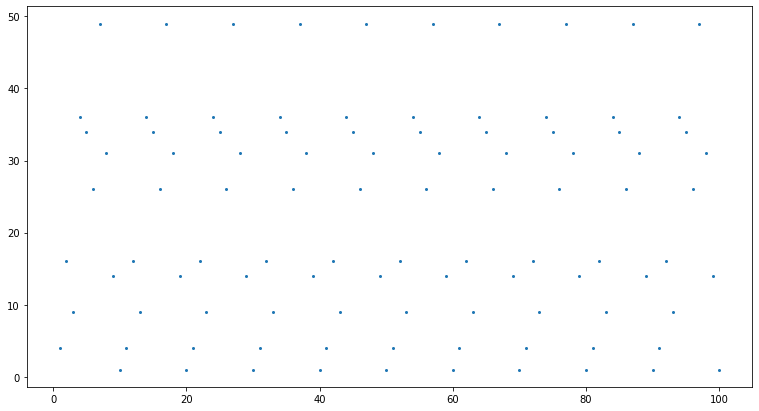

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 7))
plt.scatter(f.keys(), f.values(), s=4)

Dla lepszej widoczności okresu poniżej zamieściłam wykres z połączonymi punktami.

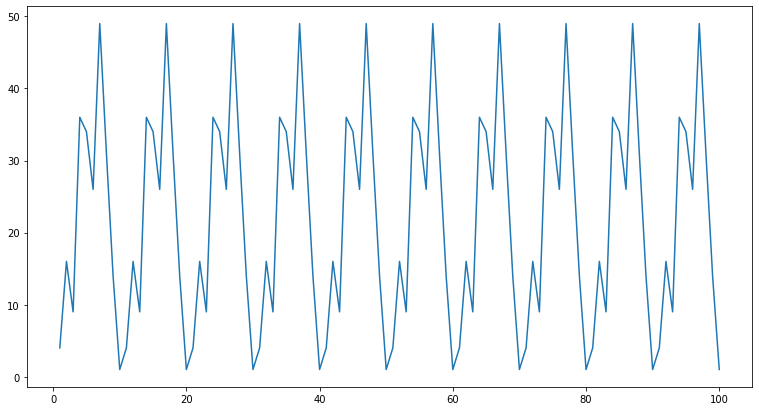

In [25]:
plt.figure(figsize=(13, 7))
plt.plot(f.keys(), f.values())

Okres możemy intuicyjnie wyznaczyć patrząc na wykres. Jednak wyznaczenie go na komputerze klasycznym jest zadaniem trudnym.

# Zadanie 2

In [26]:
import sys
sys.path.append('master-thesis/')

In [55]:
from gates.mix.modular_exponentiation import modular_exponentiation_gate

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.utils import QuantumInstance
from qiskit.visualization import plot_histogram

b = 4
N = 55
n = N.bit_length()
print(n)

# input register
x_qreg = QuantumRegister(2 * n, name='x')

# output register, must contain 1
y_qreg = QuantumRegister(n, name='y')

# ancillary register; change the size according to selected implementation
ancillary_register_size = n + 1
aux_qreg = QuantumRegister(ancillary_register_size, name='aux')

circuit = QuantumCircuit(x_qreg, y_qreg, aux_qreg)

# prepare input register
circuit.h(x_qreg[0:7])
# circuit.h(x_qreg)

# prepare output register
circuit.x(y_qreg[0])

# append gate
gate = modular_exponentiation_gate(b, N, n)
circuit.append(gate, circuit.qubits)

# measure output register
y_creg = ClassicalRegister(n, name='yValue')
circuit.add_register(y_creg)
circuit.measure(y_qreg, y_creg)

# measure input register
x_creg = ClassicalRegister(2 * n, name='xValue')
circuit.add_register(x_creg)
circuit.measure(x_qreg, x_creg)

6


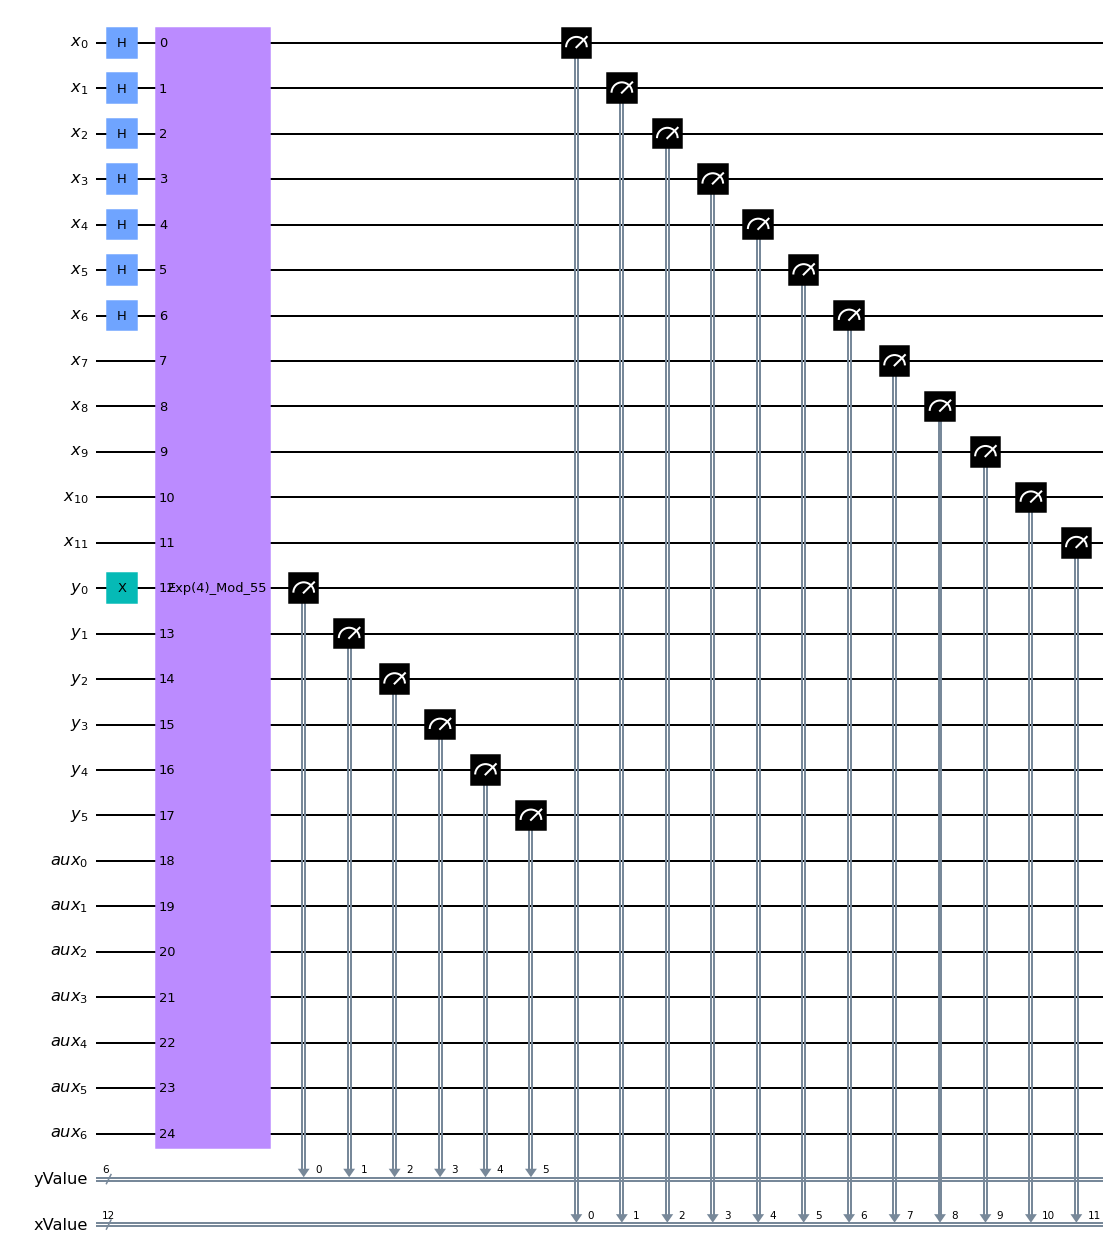

In [56]:
circuit.draw(output='mpl', fold=-1)

In [57]:
def get_quantum_instance(cloud):
    if cloud:
        from qiskit import IBMQ
        provider = IBMQ.load_account()
        backend = provider.get_backend('ibmq_qasm_simulator')
    else:
        from qiskit import Aer
        backend = Aer.get_backend('qasm_simulator')

    return QuantumInstance(backend)

In [58]:
instance = get_quantum_instance(cloud=True)

ibmqfactory.load_account:WARNING:2022-05-14 19:10:52,996: Credentials are already in use. The existing account in the session will be replaced.


In [63]:
instance.set_config(shots=512)
exponentiation_and_exponent_result = instance.execute(circuit)

In [65]:
counts = exponentiation_and_exponent_result.get_counts(circuit)
res = {}
for measurement in counts.keys():
    x, y = [int(value, base=2) for value in measurement.split(' ')]
    print(f'{x},{y}')
    res[x] = y

0,1
64,36
65,34
66,26
67,49
68,31
69,14
70,1
71,4
4,36
73,9
74,36
75,34
76,26
77,49
78,31
79,14
80,1
81,4
82,16
84,36
85,34
86,26
87,49
88,31
5,34
89,14
90,1
91,4
92,16
93,9
94,36
95,34
96,26
97,49
98,31
99,14
100,1
101,4
102,16
6,26
103,9
104,36
105,34
106,26
107,49
108,31
109,14
110,1
111,4
112,16
113,9
114,36
115,34
116,26
117,49
118,31
119,14
120,1
121,4
122,16
123,9
7,49
124,36
125,34
126,26
127,49
8,31
9,14
10,1
11,4
12,16
13,9
14,36
15,34
16,26
1,4
17,49
18,31
19,14
20,1
21,4
22,16
23,9
24,36
25,34
27,49
28,31
29,14
30,1
31,4
32,16
33,9
34,36
35,34
2,16
36,26
37,49
38,31
39,14
41,4
42,16
43,9
44,36
45,34
46,26
47,49
48,31
49,14
50,1
3,9
51,4
52,16
53,9
54,36
55,34
56,26
57,49
58,31
59,14
60,1
61,4
62,16
63,9


In [69]:
for x in range(1, 101):
    if x in res.keys():
        print(f'{b}^{x} = {res[x]} (mod {N})')

4^1 = 4 (mod 55)
4^2 = 16 (mod 55)
4^3 = 9 (mod 55)
4^4 = 36 (mod 55)
4^5 = 34 (mod 55)
4^6 = 26 (mod 55)
4^7 = 49 (mod 55)
4^8 = 31 (mod 55)
4^9 = 14 (mod 55)
4^10 = 1 (mod 55)
4^11 = 4 (mod 55)
4^12 = 16 (mod 55)
4^13 = 9 (mod 55)
4^14 = 36 (mod 55)
4^15 = 34 (mod 55)
4^16 = 26 (mod 55)
4^17 = 49 (mod 55)
4^18 = 31 (mod 55)
4^19 = 14 (mod 55)
4^20 = 1 (mod 55)
4^21 = 4 (mod 55)
4^22 = 16 (mod 55)
4^23 = 9 (mod 55)
4^24 = 36 (mod 55)
4^25 = 34 (mod 55)
4^27 = 49 (mod 55)
4^28 = 31 (mod 55)
4^29 = 14 (mod 55)
4^30 = 1 (mod 55)
4^31 = 4 (mod 55)
4^32 = 16 (mod 55)
4^33 = 9 (mod 55)
4^34 = 36 (mod 55)
4^35 = 34 (mod 55)
4^36 = 26 (mod 55)
4^37 = 49 (mod 55)
4^38 = 31 (mod 55)
4^39 = 14 (mod 55)
4^41 = 4 (mod 55)
4^42 = 16 (mod 55)
4^43 = 9 (mod 55)
4^44 = 36 (mod 55)
4^45 = 34 (mod 55)
4^46 = 26 (mod 55)
4^47 = 49 (mod 55)
4^48 = 31 (mod 55)
4^49 = 14 (mod 55)
4^50 = 1 (mod 55)
4^51 = 4 (mod 55)
4^52 = 16 (mod 55)
4^53 = 9 (mod 55)
4^54 = 36 (mod 55)
4^55 = 34 (mod 55)
4^56 = 26 (mod 55)

# Zadanie 3

In [85]:
def euclid_extended(a, b):
    if a == 0 :
        return b,0,1
    gcd, x, y = euclid_extended(b % a, a)
    return gcd, y - (b // a) * x, x

In [86]:
def euclid_extended_positive(a, b):
    return euclid_extended(a, b)[-1] % a

In [88]:
euclid_extended_positive(40, 17)

33

In [90]:
from implementations.mix import MixShor as Shor

def eves_algorithm(N, c, b):
    instance = get_quantum_instance(cloud=True)
    instance.set_config(shots=64)
    shor = Shor(instance)
    circuit = shor.construct_circuit(b, N, semi_classical=False, measurement=True)
    result = shor.get_order(b, N, semi_classical=True)
    r = result.order
    d = euclid_extended_positive(r, c)
    a = pow(b, d, N)
    return a, d

a, d = eves_algorithm(55, 17, 4)
print(f'a={a}, d={d}')

ibmqfactory.load_account:WARNING:2022-05-14 19:56:43,682: Credentials are already in use. The existing account in the session will be replaced.


a=9, d=3


# Zadanie 4


In [111]:
from random import randint
from math import gcd

instance = get_quantum_instance(cloud=True)
instance.set_config(shots=64)

def factorize(n, instance = instance):
    a = randint(2, N)

    gcd_a_n = gcd(a, n)
    if gcd_a_n > 1 and gcd_a_n < n:
        return gcd_a_n, n // gcd_a_n

    shor = Shor(instance)
    circuit = shor.construct_circuit(b, N, semi_classical=False, measurement=True)
    r = shor.get_order(b, N, semi_classical=True).order

    if r % 2 == 1:
        return factorize(n)

    gcd2 = gcd(pow(a, r//2) + 1, n)
    if gcd2 == n or gcd2 == 1:
       return factorize(n)

    return gcd2, n // gcd2

ibmqfactory.load_account:WARNING:2022-05-14 23:44:58,655: Credentials are already in use. The existing account in the session will be replaced.


In [103]:
factorize(55)

(5, 11)

In [112]:
factorize(2137 * 101)

Currently computed order 110 differs from already stored: 10.
Currently computed order 240 differs from already stored: 10.
Currently computed order 270 differs from already stored: 10.
Currently computed order 270 differs from already stored: 10.
Currently computed order 270 differs from already stored: 10.
Currently computed order 260 differs from already stored: 10.
Currently computed order 80 differs from already stored: 10.
Currently computed order 170 differs from already stored: 10.
Currently computed order 260 differs from already stored: 10.
Currently computed order 260 differs from already stored: 10.
Currently computed order 140 differs from already stored: 10.
Currently computed order 260 differs from already stored: 10.
Currently computed order 110 differs from already stored: 10.
Currently computed order 260 differs from already stored: 10.
Currently computed order 110 differs from already stored: 10.
Currently computed order 220 differs from already stored: 10.
Currently

(101, 2137)

In [110]:
def bob(N, c, b):
    p, q = factorize(N)
    r = (p - 1) * (q - 1)
    d = euclid_extended_positive(r, c)
    a = pow(b, d, N)
    return a, d

bob(55, 17, 4)

Currently computed order 40 differs from already stored: 10.


(9, 33)

Algorytm Boba:
* trudniejszy w implementacji
* trudniejszy obliczeniowo - faktoryzacja może wymagać wielokrotnego losowania lub wyznaczania r
* lepszy, jeśli oczekujemy, że pojawi się wiele wiadomości szyfrowanych tym samym kluczem

Algorytm Ewy:
* łatwiejszy w implementacji
* daje nam rząd tylko dla danego elemetu (b), nie dla całej grupy, więc przy wielu wiadomościach może być bardziej kosztowny obliczeniowo